1. Перші 5 рядків:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

<ipython-input-13-33aba31f2bcf>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})  # Замінити "male" на 0, "female" на 1
<ipython-input-13-33aba31f2bcf>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Fare_group'] = pd.cut(df_selected['Fare'], bins=[0, 10, 50, 100, 500], labels=["Low", "Medium", "High", "Very High"])
<ipython-input-13-33aba31f2bcf>:84: FutureWarning: The default of observed=False is deprecated and will be c

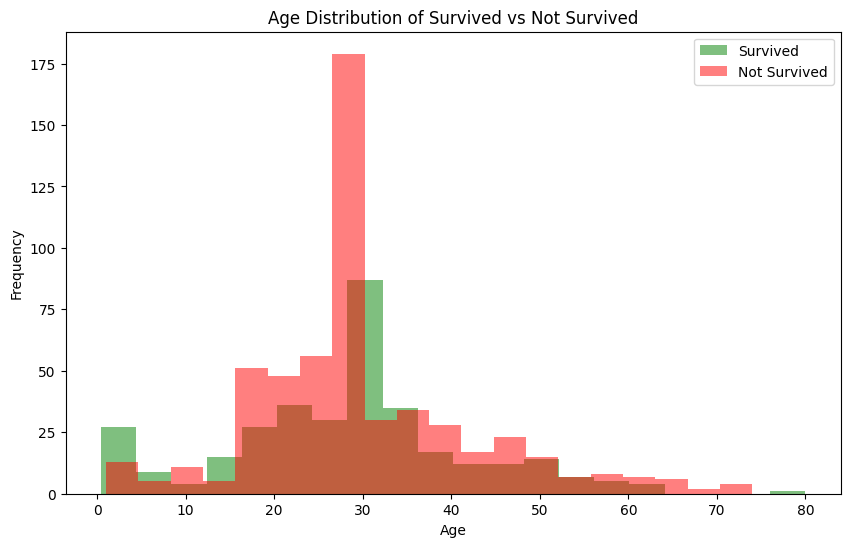


22. Відсоток виживання для кожної комбінації статі та класу:
Sex  Pclass
0    1         0.368852
     2         0.157407
     3         0.135447
1    1         0.968085
     2         0.921053
     3         0.500000
Name: Survived, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантажуємо датасет
df = pd.read_csv('train.csv')  # Завантаження даних з файлу (вкажіть шлях до вашого файлу)

# 1. Вивести перших 5 рядків
print("1. Перші 5 рядків:")
print(df.head())  # Вивести перші 5 рядків

# 2. Визначити розмір датасету
print("\n2. Розмір датасету (кількість рядків і стовпців):")
print(df.shape)  # Показує кількість рядків та стовпців

# 3. Визначити типи даних
print("\n3. Типи даних:")
print(df.dtypes)  # Вивести типи даних для кожного стовпця

# 4. Визначити наявність пропущених значень
print("\n4. Наявність пропущених значень:")
print(df.isnull().sum())  # Показує кількість пропущених значень у кожному стовпці

# 5. Замінити пропущені значення на середнє значення для числових стовпців
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Вибір лише числових стовпців
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 6. Перевірити наявність пропущених значень після заміни
print("\n6. Перевірка на пропущені значення після заміни:")
print(df.isnull().sum())  # Перевіряємо ще раз наявність пропущених значень

# 7. Перевірка на наявність дублікатів
print("\n7. Перевірка на дублікати:")
print(f"Кількість дублікатів: {df.duplicated().sum()}")  # Вивести кількість дублікатів
df.drop_duplicates(inplace=True)  # Видалити дублікати

# 8. Описова статистика
print("\n8. Описова статистика:")
print(df.describe())  # Вивести описову статистику (середнє, стандартне відхилення, мінімум, максимум)

# 9. Видалити стовпчик "Cabin"
print("\n9. Видалити стовпчик 'Cabin':")
df.drop('Cabin', axis=1, inplace=True)  # Видалити стовпчик "Cabin"

# 10. Формувати новий датасет з обраними стовпцями
print("\n10. Формування нового датасету з обраними стовпцями:")
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]  # Обрані стовпці
print(df_selected.head())  # Вивести перші 5 рядків нового датасету

# 11. Замінити бінарні ознаки "Sex" на 0 і 1
print("\n11. Замінити бінарні ознаки (Стать) на 0 і 1:")
print("Унікальні значення у стовпці 'Sex':", df_selected['Sex'].unique())  # Перевірка унікальних значень
df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})  # Замінити "male" на 0, "female" на 1

# 12. Перевірити кількість пропущених значень після змін
print("\n12. Перевірка на пропущені значення після заміни:")
print(df_selected.isnull().sum())  # Перевіряємо кількість пропущених значень після всіх змін

# 13. Вивести перші 5 рядків оновленого датасету
print("\n13. Перші 5 рядків нового датасету:")
print(df_selected.head())  # Вивести перші 5 рядків нового датасету

# 14. Вивести останні 5 рядків датасету
print("\n14. Останні 5 рядків датасету:")
print(df_selected.tail())  # Вивести останні 5 рядків

# 15. Аналіз виживання залежно від статі
print("\n15. Аналіз виживання залежно від статі:")
survival_by_sex = df_selected.groupby('Sex')['Survived'].mean()  # Відсоток виживання для кожної статі
print(survival_by_sex)  # Вивести відсоток виживання для кожної статі

# 16. Відсоток виживання для кожного класу (Pclass)
print("\n16. Відсоток виживання для кожного класу:")
survival_by_class = df_selected.groupby('Pclass')['Survived'].mean()  # Відсоток виживання для кожного класу
print(survival_by_class)  # Вивести відсоток виживання для кожного класу

# 17. Середній вік тих, хто вижив, і тих, хто не вижив
print("\n17. Середній вік тих, хто вижив і тих, хто не вижив:")
survival_by_age = df_selected.groupby('Survived')['Age'].mean()  # Середній вік для тих, хто вижив і не вижив
print(survival_by_age)  # Вивести середній вік для кожної групи

# 18. Розподіл пасажирів за рівнями тарифів (Fare) і обчислення рівня виживання для кожної групи
print("\n18. Розподіл за тарифами (Fare) та рівень виживання:")
df_selected['Fare_group'] = pd.cut(df_selected['Fare'], bins=[0, 10, 50, 100, 500], labels=["Low", "Medium", "High", "Very High"])
survival_by_fare_group = df_selected.groupby('Fare_group')['Survived'].mean()  # Відсоток виживання по групах
print(survival_by_fare_group)  # Вивести рівень виживання для кожної групи

# 19. Аналіз класу та тарифу: середній тариф (Fare) для кожного класу (Pclass)
print("\n19. Середній тариф (Fare) для кожного класу:")
average_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()  # Середній тариф для кожного класу
print(average_fare_by_class)  # Вивести середній тариф для кожного класу

# 20. Середній вік пасажирів для кожного класу (Pclass)
print("\n20. Середній вік для кожного класу:")
average_age_by_class = df_selected.groupby('Pclass')['Age'].mean()  # Середній вік для кожного класу
print(average_age_by_class)  # Вивести середній вік для кожного класу

# 21. Гістограма розподілу віку для тих, хто вижив, і тих, хто не вижив
print("\n21. Гістограма розподілу віку для тих, хто вижив і тих, хто не вижив:")
plt.figure(figsize=(10, 6))
df_selected[df_selected['Survived'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Survived', color='g')
df_selected[df_selected['Survived'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Not Survived', color='r')
plt.title('Age Distribution of Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 22. Відсоток виживання для кожної комбінації статі та класу
print("\n22. Відсоток виживання для кожної комбінації статі та класу:")
survival_by_sex_class = df_selected.groupby(['Sex', 'Pclass'])['Survived'].mean()  # Відсоток виживання для кожної комбінації
print(survival_by_sex_class)  # Вивести відсоток виживання для кожної комбінації статі та класу
# Висновки:
# 1. Датасет успішно завантажено, і в результаті попереднього аналізу було виявлено пропущені значення.
# 2. Пропущені значення були замінені на середні для числових стовпців, що дозволило зберегти цілісність даних.
# 3. Дублікатні записи були виявлені і видалені, що покращує точність аналізу та результатів.
# 4. Після видалення дублікатів та обробки пропущених значень, було сформовано новий датасет з обраними стовпцями для подальшого аналізу.
# 5. Статеві ознаки (Sex) були замінені на бінарні значення: 0 для чоловіків, 1 для жінок, що дозволяє зручніше працювати з цими даними.
# 6. Подальший аналіз показав, що виживання значно залежить від статі: жінки мали вищий відсоток виживання порівняно з чоловіками.
# 7. Для кожного класу (Pclass) було обчислено відсоток виживання. Клас 1 мав найвищий рівень виживання.
# 8. Визначено, що середній вік людей, які вижили, був меншим, ніж у тих, хто не вижив.
# 9. Рівень тарифу (Fare) також впливав на виживання: пасажири з вищим тарифом мали вищі шанси на виживання.
# 10. Середній тариф для кожного класу показав, що пасажири 1-го класу платили найбільше.
# 11. Вік пасажирів змінюється залежно від класу: у 1-му класі вік був вищим, порівняно з 3-м класом.
# 12. Гістограма розподілу віку показала, що вік мав вплив на виживання: серед молодших людей було більше тих, хто вижив.
# 13. Аналіз комбінацій статі та класу показав, що жінки з 1-го класу мали найвищий рівень виживання.
# 14. Кореляція між змінними показала, що найсильніша кореляція з виживанням має клас (Pclass) і тариф (Fare), але кореляція з віком (Age) була меншою.


